## Libraries

In [1]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle
# We import the Logistic Regression module from sk learn for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
#We import the necessary libraries for visualization. We set seaborn do be our default.
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
# We import the Linear Regression module from sk learn for the quantity model.
from sklearn.linear_model import LinearRegression

## Data Preparation

In [2]:
#load data
df_purchase = pd.read_csv(r'C:\Users\prizz\Desktop\Data courses\365 datascience\365datascience_Customer Analytics in Python\20_Getting to know the Purchase dataset\purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model

In [3]:
Y = df_pa['Incidence']

In [4]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [5]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)
model_purchase.score(X, Y)

0.7506005826929958

In [6]:
model_purchase.coef_

array([[-2.34766896]])

## Price Elasticity of Purchase Probability

In [7]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
price_range = np.arange (0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range = pd.DataFrame(price_range)

In [10]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [11]:
Y_pr

array([[0.08214988, 0.91785012],
       [0.0839375 , 0.9160625 ],
       [0.08576039, 0.91423961],
       [0.08761909, 0.91238091],
       [0.08951412, 0.91048588],
       [0.09144603, 0.90855397],
       [0.09341536, 0.90658464],
       [0.09542264, 0.90457736],
       [0.09746842, 0.90253158],
       [0.09955323, 0.90044677],
       [0.10167761, 0.89832239],
       [0.1038421 , 0.8961579 ],
       [0.10604722, 0.89395278],
       [0.10829351, 0.89170649],
       [0.1105815 , 0.8894185 ],
       [0.1129117 , 0.8870883 ],
       [0.11528464, 0.88471536],
       [0.11770084, 0.88229916],
       [0.1201608 , 0.8798392 ],
       [0.12266502, 0.87733498],
       [0.125214  , 0.874786  ],
       [0.12780824, 0.87219176],
       [0.13044821, 0.86955179],
       [0.13313439, 0.86686561],
       [0.13586724, 0.86413276],
       [0.13864721, 0.86135279],
       [0.14147475, 0.85852525],
       [0.14435029, 0.85564971],
       [0.14727425, 0.85272575],
       [0.15024704, 0.84975296],
       [0.

In [12]:
purchase_pr = Y_pr[:][:,1]

In [13]:
pe = model_purchase.coef_[:,0] * price_range * (1 - purchase_pr)

In [14]:
df_price_elasticities = pd.DataFrame(price_range)

In [15]:
df_price_elasticities = df_price_elasticities.rename(columns = {0:'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096430
1,0.51,-0.100499
2,0.52,-0.104695
3,0.53,-0.109021
4,0.54,-0.113481
...,...,...
295,3.45,-8.011531
296,3.46,-8.036778
297,3.47,-8.061989
298,3.48,-8.087167


In [16]:
pd.options.display.max_rows = None
df_price_elasticities.head()

,Price_Point,Mean_PE
0,0.50,-0.096430
1,0.51,-0.100499
2,0.52,-0.104695
3,0.53,-0.109021
4,0.54,-0.113481


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

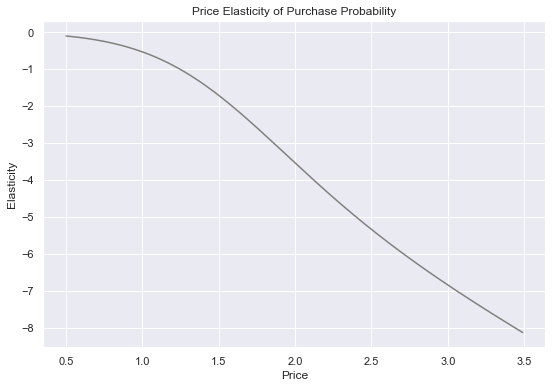

In [17]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability by Segments

### Segment 1 - Career Focused

In [18]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [19]:
Y = df_pa_segment_1['Incidence']

In [20]:
X = pd.DataFrame()

In [21]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] +
                   df_pa_segment_1['Price_5']) / 5

In [22]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [23]:
model_incidence_segment_1.coef_

array([[-1.72248527]])

In [24]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pe_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pe_segment_1)

### Results

In [25]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096430,-0.118622
1,0.51,-0.100499,-0.122803
2,0.52,-0.104695,-0.127077
3,0.53,-0.109021,-0.131447
4,0.54,-0.113481,-0.135914


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

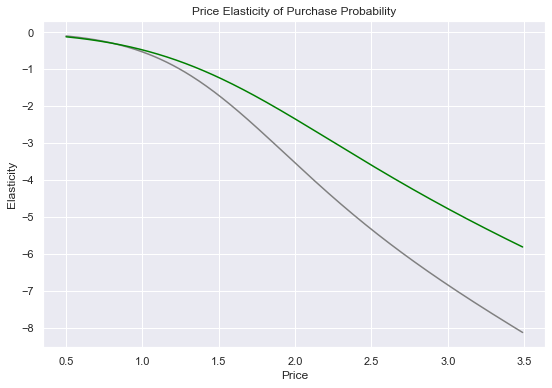

In [26]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Segment 0 - Fewer Opportunities

In [27]:
# Select only customers from segment 0, the fewer-opportunities.
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

In [28]:
# Logistic regression model
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

# Calculate price elasticities
model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range * ( 1- purchase_pr_segment0)

### Results

In [29]:
df_price_elasticities['PE_Segment_0'] = pe_segment0
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_0
0,0.50,-0.096430,-0.118622,-0.032293
1,0.51,-0.100499,-0.122803,-0.034125
2,0.52,-0.104695,-0.127077,-0.036046
3,0.53,-0.109021,-0.131447,-0.038060
4,0.54,-0.113481,-0.135914,-0.040172


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

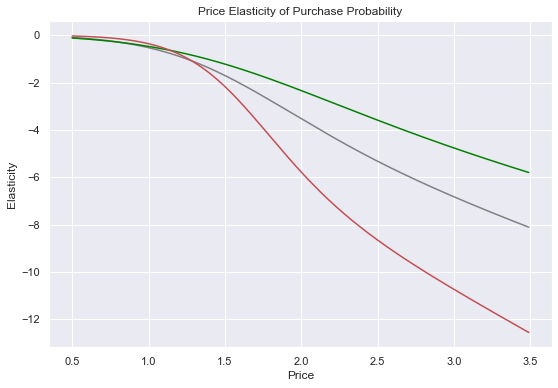

In [30]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment0, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Segment 2 - Standard

In [31]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_2', value = pe_segment2)

### Segment 3 - Well-Off 

In [32]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

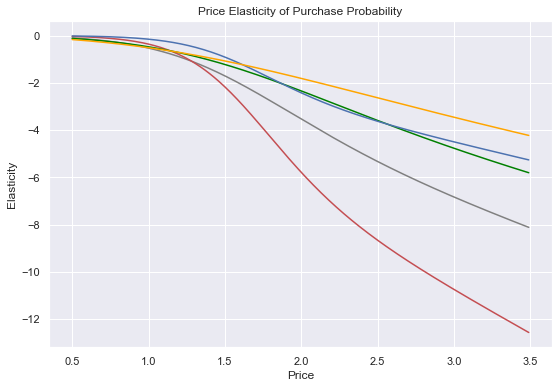

In [33]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'r')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'b')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

### Data Preparation

In [34]:
Y = df_pa['Incidence']

In [35]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5

In [36]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5']) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [37]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_


array([[-1.49386965,  0.56144682]])

### Price Elasticity with Promotion

In [38]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: 'Price_Range'})

In [39]:
 df_price_elasticity_promotion['Promotion'] = 1

In [40]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [41]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [42]:
df_price_elasticities['Elasticities_Promotion_1'] = price_elasticity_promo
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683


### Price elasticity without Promotion

In [43]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no.rename = df_price_elasticity_promotion.rename(columns = {0: 'Price_Range'})

In [44]:
df_price_elasticity_promotion_no['No_Promotion'] = 0

In [45]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [46]:
no_promo = Y_no_promo[:, 1]
price_elasticity_no_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - no_promo)

In [47]:
df_price_elasticities['Elasticities_Promotion_0'] = price_elasticity_no_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1,Elasticities_Promotion_0
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741,-0.195642
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857,-0.201763
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052,-0.207987
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327,-0.214314
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683,-0.220744
5,0.55,-0.118077,-0.017741,-0.140480,-0.042385,-0.190485,-0.147121,-0.227280
6,0.56,-0.122813,-0.018711,-0.145145,-0.044704,-0.195774,-0.151642,-0.233921
7,0.57,-0.127692,-0.019728,-0.149912,-0.047133,-0.201139,-0.156246,-0.240669
8,0.58,-0.132718,-0.020793,-0.154781,-0.049678,-0.206581,-0.160936,-0.247524
9,0.59,-0.137894,-0.021909,-0.159756,-0.052343,-0.212099,-0.165711,-0.254488


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

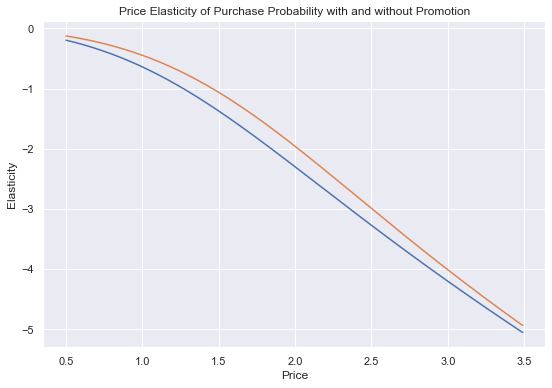

In [48]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

## Brand Choice

### Data Preparation

In [49]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [50]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,0,1,0,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,0,1,0,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,0,1,0,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,0,1,0,0,0


In [51]:
Y = brand_choice['Brand']

In [52]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [53]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
X = brand_choice[features]

In [54]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)
model_brand_choice.coef_

array([[-3.91593668,  0.65847221,  2.41780327,  0.70410043, -0.20208141],
       [ 1.27461933, -1.87985126, -0.21262159, -0.20633521,  0.58787782],
       [ 1.62414486,  0.56208288,  0.50072701,  1.03947407,  0.45273603],
       [ 0.57454533,  0.39559322, -1.40058039, -1.2462375 ,  0.24935965],
       [ 0.44262716,  0.26370295, -1.3053283 , -0.29100179, -1.08789208]])

In [55]:
model_brand_choice.coef_

array([[-3.91593668,  0.65847221,  2.41780327,  0.70410043, -0.20208141],
       [ 1.27461933, -1.87985126, -0.21262159, -0.20633521,  0.58787782],
       [ 1.62414486,  0.56208288,  0.50072701,  1.03947407,  0.45273603],
       [ 0.57454533,  0.39559322, -1.40058039, -1.2462375 ,  0.24935965],
       [ 0.44262716,  0.26370295, -1.3053283 , -0.29100179, -1.08789208]])

In [56]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915937,0.658472,2.417803,0.704100,-0.202081
1,1.274619,-1.879851,-0.212622,-0.206335,0.587878
2,1.624145,0.562083,0.500727,1.039474,0.452736
3,0.574545,0.395593,-1.400580,-1.246238,0.249360
4,0.442627,0.263703,-1.305328,-0.291002,-1.087892


In [57]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


### Own Price Elasticity Brand 5

In [58]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [59]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [60]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [61]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [62]:
own_price_elasticity_brand_5 = beta5 * price_range * (1- pr_own_brand_5)

In [63]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1,Elasticities_Promotion_0,Brand_5
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741,-0.195642,-0.049055
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857,-0.201763,-0.050616
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052,-0.207987,-0.052206
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327,-0.214314,-0.053826
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683,-0.220744,-0.055477
5,0.55,-0.118077,-0.017741,-0.140480,-0.042385,-0.190485,-0.147121,-0.227280,-0.057158
6,0.56,-0.122813,-0.018711,-0.145145,-0.044704,-0.195774,-0.151642,-0.233921,-0.058870
7,0.57,-0.127692,-0.019728,-0.149912,-0.047133,-0.201139,-0.156246,-0.240669,-0.060614
8,0.58,-0.132718,-0.020793,-0.154781,-0.049678,-0.206581,-0.160936,-0.247524,-0.062390
9,0.59,-0.137894,-0.021909,-0.159756,-0.052343,-0.212099,-0.165711,-0.254488,-0.064199


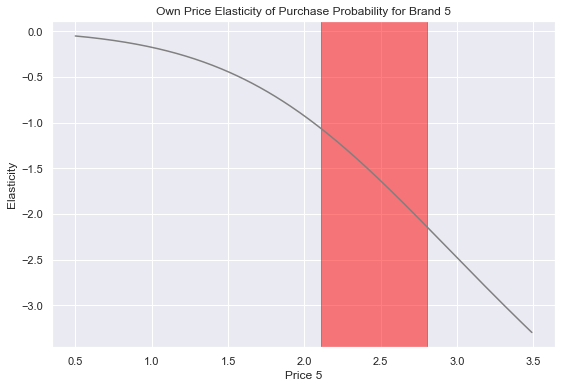

In [64]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')
plt.axvspan(2.11, 2.80, color='red', alpha=0.5)

### Cross Price Elasticity Brand 5, Cross Brand 4

In [65]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['price_5'] = brand_choice['Price_5'].mean()

In [66]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [67]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [68]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [69]:
beta5

-1.09

In [70]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [71]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1,Elasticities_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741,-0.195642,-0.049055,0.332011
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857,-0.201763,-0.050616,0.337287
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052,-0.207987,-0.052206,0.342507
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327,-0.214314,-0.053826,0.347668
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683,-0.220744,-0.055477,0.352773
5,0.55,-0.118077,-0.017741,-0.140480,-0.042385,-0.190485,-0.147121,-0.227280,-0.057158,0.357820
6,0.56,-0.122813,-0.018711,-0.145145,-0.044704,-0.195774,-0.151642,-0.233921,-0.058870,0.362809
7,0.57,-0.127692,-0.019728,-0.149912,-0.047133,-0.201139,-0.156246,-0.240669,-0.060614,0.367741
8,0.58,-0.132718,-0.020793,-0.154781,-0.049678,-0.206581,-0.160936,-0.247524,-0.062390,0.372614
9,0.59,-0.137894,-0.021909,-0.159756,-0.052343,-0.212099,-0.165711,-0.254488,-0.064199,0.377429


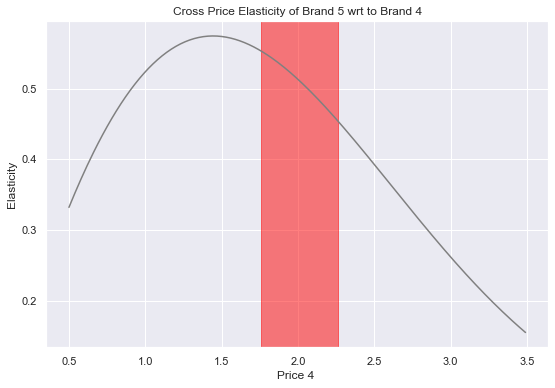

In [72]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4 ')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')
plt.axvspan(1.76, 2.26, color='red', alpha=0.5)

## Own and Cross-Price Elasticity by Segment

### Well-Off

In [73]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [74]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.78,0.13,-0.10
Price_2,-0.95,-1.37,1.24,0.79,0.29
Price_3,2.00,-1.66,-0.41,-0.01,0.09
Price_4,2.52,0.95,-0.20,-1.92,-1.34
Price_5,-1.00,-0.30,1.18,0.56,-0.44


### Own-Brand Price Elasticity

In [75]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### Cross-Brand Price Elasticity

In [76]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1,Elasticities_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741,-0.195642,-0.049055,0.332011,-0.298432,0.482873
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857,-0.201763,-0.050616,0.337287,-0.304490,0.492185
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052,-0.207987,-0.052206,0.342507,-0.310559,0.501481
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327,-0.214314,-0.053826,0.347668,-0.316637,0.510762
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683,-0.220744,-0.055477,0.352773,-0.322727,0.520026
5,0.55,-0.118077,-0.017741,-0.140480,-0.042385,-0.190485,-0.147121,-0.227280,-0.057158,0.357820,-0.328827,0.529275
6,0.56,-0.122813,-0.018711,-0.145145,-0.044704,-0.195774,-0.151642,-0.233921,-0.058870,0.362809,-0.334939,0.538508
7,0.57,-0.127692,-0.019728,-0.149912,-0.047133,-0.201139,-0.156246,-0.240669,-0.060614,0.367741,-0.341063,0.547724
8,0.58,-0.132718,-0.020793,-0.154781,-0.049678,-0.206581,-0.160936,-0.247524,-0.062390,0.372614,-0.347199,0.556923
9,0.59,-0.137894,-0.021909,-0.159756,-0.052343,-0.212099,-0.165711,-0.254488,-0.064199,0.377429,-0.353347,0.566106


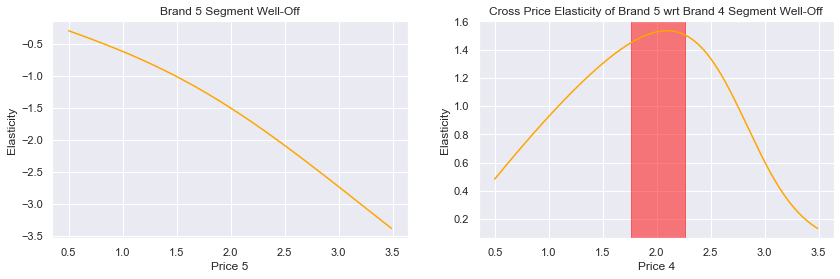

In [77]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.    
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')
plt.axvspan(1.76, 2.26, color='red', alpha=0.5)

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

## Standard

In [78]:
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]
brand_choice_s2.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,2,0,0,1,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,2,0,0,1,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,2,0,0,1,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,2,0,0,1,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,2,0,0,1,0


In [79]:
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### Own-Brand Price Elasticity

In [80]:
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(10, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### Cross-Brand Price Elasticity

In [81]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)

## Career-Focused

In [82]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [83]:
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### Own-Brand Price Elasticity

In [84]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### Cross-Brand Price Elasticity

In [85]:
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

## Fewer Opportunities

In [86]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]

In [87]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### Own-Brand Price Elasticity

In [88]:
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(14, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### Cross-Brand Price Elasticity

In [89]:
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1,Elasticities_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741,-0.195642,-0.049055,0.332011,-0.115828,0.174104,-0.039243,0.196460,-0.001038,0.172837,-0.298432,0.482873
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857,-0.201763,-0.050616,0.337287,-0.118867,0.176159,-0.040244,0.198955,-0.001100,0.175108,-0.304490,0.492185
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052,-0.207987,-0.052206,0.342507,-0.121941,0.178163,-0.041256,0.201398,-0.001165,0.177335,-0.310559,0.501481
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327,-0.214314,-0.053826,0.347668,-0.125050,0.180117,-0.042277,0.203790,-0.001234,0.179518,-0.316637,0.510762
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683,-0.220744,-0.055477,0.352773,-0.128194,0.182020,-0.043308,0.206131,-0.001306,0.181658,-0.322727,0.520026
5,0.55,-0.118077,-0.017741,-0.140480,-0.042385,-0.190485,-0.147121,-0.227280,-0.057158,0.357820,-0.131375,0.183874,-0.044350,0.208421,-0.001382,0.183755,-0.328827,0.529275
6,0.56,-0.122813,-0.018711,-0.145145,-0.044704,-0.195774,-0.151642,-0.233921,-0.058870,0.362809,-0.134592,0.185677,-0.045401,0.210660,-0.001462,0.185809,-0.334939,0.538508
7,0.57,-0.127692,-0.019728,-0.149912,-0.047133,-0.201139,-0.156246,-0.240669,-0.060614,0.367741,-0.137847,0.187431,-0.046463,0.212849,-0.001546,0.187820,-0.341063,0.547724
8,0.58,-0.132718,-0.020793,-0.154781,-0.049678,-0.206581,-0.160936,-0.247524,-0.062390,0.372614,-0.141139,0.189137,-0.047534,0.214989,-0.001634,0.189789,-0.347199,0.556923
9,0.59,-0.137894,-0.021909,-0.159756,-0.052343,-0.212099,-0.165711,-0.254488,-0.064199,0.377429,-0.144468,0.190794,-0.048617,0.217079,-0.001727,0.191715,-0.353347,0.566106


Text(0.5, 0, 'Price 4')

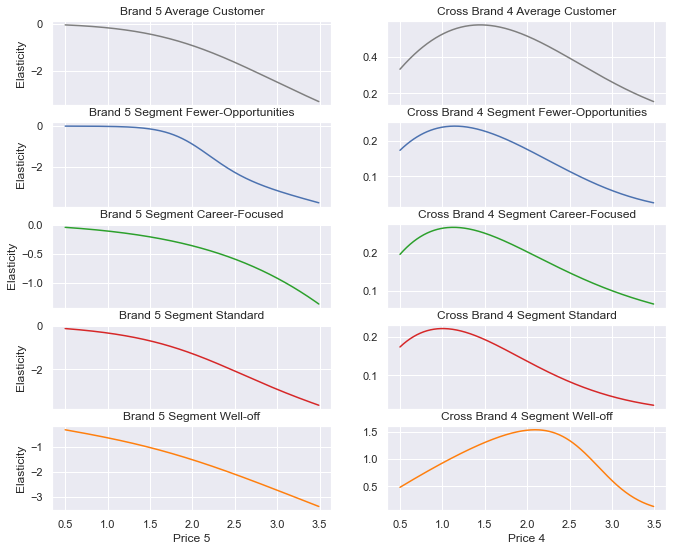

In [90]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Standard')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Standard')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

## Price Elasticity of Purchase Quantity

In [91]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0


In [92]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.341235,0.294303,0.300314,0.175229,0.230154,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.128625,0.455744,0.458410,0.380176,0.420946,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [94]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [95]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

### Model Estimation. Linear Regression 

In [96]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
X.head()

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0


In [97]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [98]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)
model_quantity.score(X, Y)

0.04147923862865888

In [99]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

### Price Elasticity with Promotion

In [100]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [101]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685002

In [102]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [103]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [104]:
df_price_elasticities['PE_Quantity_Promotion1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1,Elasticities_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion1
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741,-0.195642,-0.049055,0.332011,-0.115828,0.174104,-0.039243,0.196460,-0.001038,0.172837,-0.298432,0.482873,-0.102157
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857,-0.201763,-0.050616,0.337287,-0.118867,0.176159,-0.040244,0.198955,-0.001100,0.175108,-0.304490,0.492185,-0.104413
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052,-0.207987,-0.052206,0.342507,-0.121941,0.178163,-0.041256,0.201398,-0.001165,0.177335,-0.310559,0.501481,-0.106679
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327,-0.214314,-0.053826,0.347668,-0.125050,0.180117,-0.042277,0.203790,-0.001234,0.179518,-0.316637,0.510762,-0.108954
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683,-0.220744,-0.055477,0.352773,-0.128194,0.182020,-0.043308,0.206131,-0.001306,0.181658,-0.322727,0.520026,-0.111238


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotions')

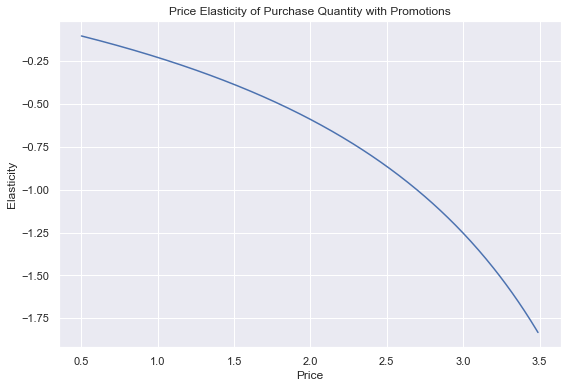

In [105]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotions')

### Price Elasticity without Promotion

In [106]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_1,PE_Segment_0,PE_Segment_3,Elasticities_Promotion_1,Elasticities_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion1,PE_Quantity_Promotion_0
0,0.50,-0.096430,-0.013517,-0.118622,-0.032293,-0.165164,-0.125741,-0.195642,-0.049055,0.332011,-0.115828,0.174104,-0.039243,0.196460,-0.001038,0.172837,-0.298432,0.482873,-0.102157,-0.099543
1,0.51,-0.100499,-0.014284,-0.122803,-0.034125,-0.170080,-0.129857,-0.201763,-0.050616,0.337287,-0.118867,0.176159,-0.040244,0.198955,-0.001100,0.175108,-0.304490,0.492185,-0.104413,-0.101736
2,0.52,-0.104695,-0.015088,-0.127077,-0.036046,-0.175070,-0.134052,-0.207987,-0.052206,0.342507,-0.121941,0.178163,-0.041256,0.201398,-0.001165,0.177335,-0.310559,0.501481,-0.106679,-0.103939
3,0.53,-0.109021,-0.015931,-0.131447,-0.038060,-0.180134,-0.138327,-0.214314,-0.053826,0.347668,-0.125050,0.180117,-0.042277,0.203790,-0.001234,0.179518,-0.316637,0.510762,-0.108954,-0.106150
4,0.54,-0.113481,-0.016815,-0.135914,-0.040172,-0.185272,-0.142683,-0.220744,-0.055477,0.352773,-0.128194,0.182020,-0.043308,0.206131,-0.001306,0.181658,-0.322727,0.520026,-0.111238,-0.108369


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

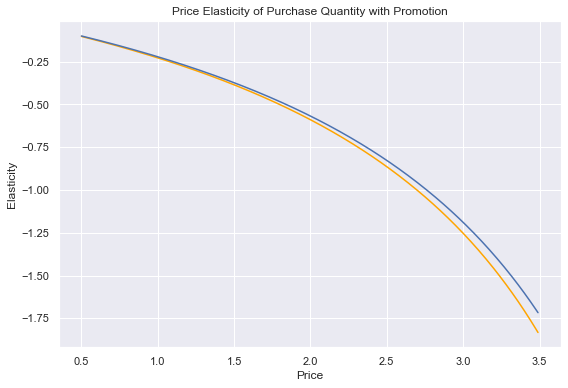

In [107]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')